In [11]:
# import libraries:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")
import os 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# use this code to install the libraries
#import sys
#!{sys.executable} -m pip install matplotlib

In [12]:
# read the data:

def data_read(filepath, filename):
    """_Function to read the data_

    Args:
        filepath (_str_): _Filepath of the data_
        filename (_str_): _Filename of the data_

    Returns:
        _dataframe_: _dataframe containing the loaded data_
    """
    data = pd.read_csv(os.path.join(filepath, filename))
    return data



filepath = r"C:\Users\hp\Desktop\ml_algorithms\ml_algorithms\data"
train_data = data_read(filepath, "train.csv")
test_data = data_read(filepath, "test.csv")

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers 
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person 
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [17]:
# checking the head of the data:
train_data = train_data.drop(columns= ['Unnamed: 0'])

In [18]:
# check the top few rows of the dataset:
train_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [19]:
# check the column types 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   surface_area                   362 non-null    float64
 1   agricultural_land              358 non-null    float64
 2   forest_area                    357 non-null    float64
 3   armed_forces_total             318 non-null    float64
 4   urban_pop_major_cities         360 non-null    float64
 5   urban_pop_minor_cities         360 non-null    float64
 6   national_income                362 non-null    object 
 7   inflation_annual               146 non-null    float64
 8   inflation_monthly              156 non-null    float64
 9   inflation_weekly               20 non-null     float64
 10  mobile_subscriptions           362 non-null    object 
 11  internet_users                 362 non-null    object 
 12  secure_internet_servers_total  352 non-null    flo

In [20]:
# Number of rows and columns:
train_data.shape

(362, 16)

In [22]:
# Description: 
train_data.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


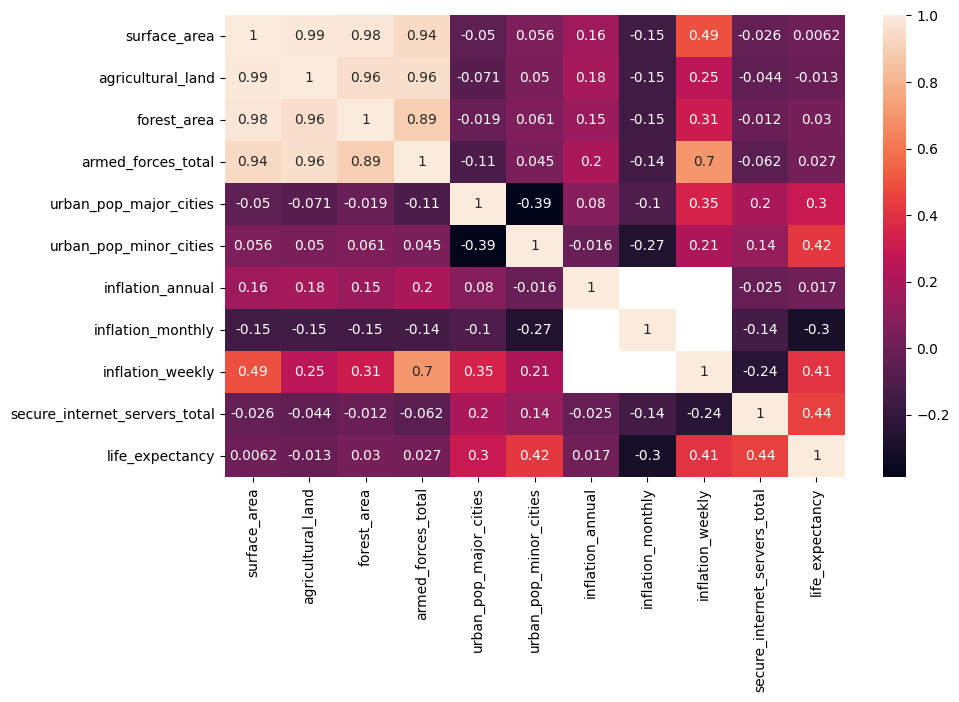

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.select_dtypes(include=["float64"]).corr(), annot=True)
plt.show()

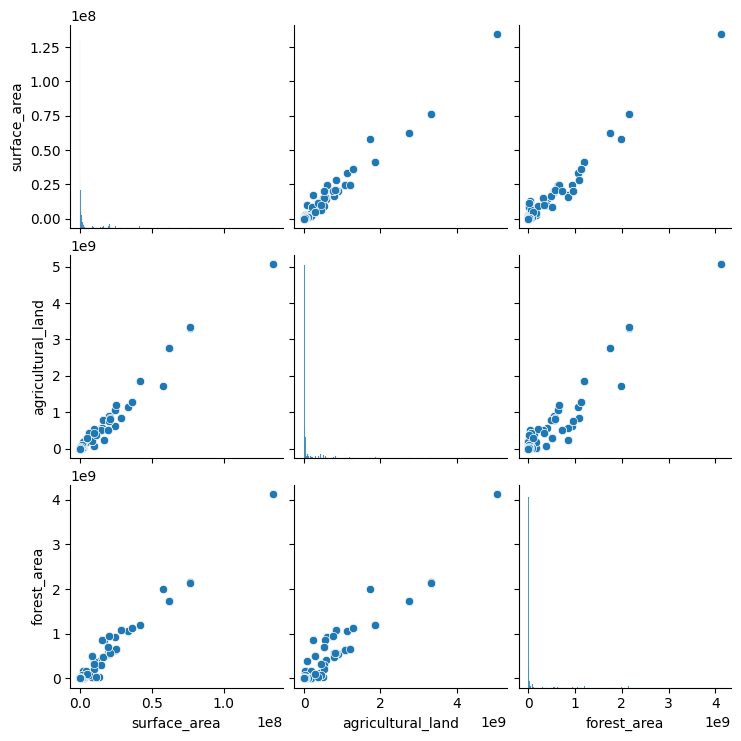

In [27]:
# seeing the relationship between three variables:
sns.pairplot(train_data[["surface_area", "agricultural_land", "forest_area"]])

<Axes: xlabel='surface_area', ylabel='Density'>

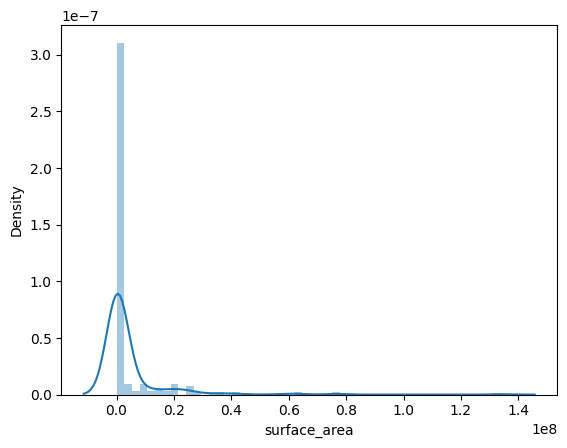

In [28]:
sns.distplot(train_data["surface_area"])

***There are strong linear relashionships among 'surface_area', 'agricultural_land', and 'forest_area'.***
Therefore, having these three variables altogether will not help (provide additional information) future prediction. To resolve this 
problem the following steps are taken:  <br>
1) Multiply 'surface_area' by 100 (to fix data entry/unit issue).  <br>
2) Create two new features (colums) namely 'agricultural_portion' and 'forest_portion' by dividing
   'agricultural_land' and 'forest_area' by 'surface_area' respectively.  <br>
3) Remove 'agricultural_land' and 'forest_area' colums from dataset.

In [29]:
# create temp data:
temp_train = train_data.copy()

temp_train["surface_area"] = temp_train["surface_area"] * 100
temp_train["agri_land_percent"]  = temp_train["agricultural_land"] / temp_train["surface_area"]
temp_train["forest_land_percent"]  = temp_train["forest_area"] / temp_train["surface_area"]

# dropping the columns agricultural land and forest area:
drop_cols = ["agricultural_land", "forest_area"]
temp_train.drop(columns= drop_cols, inplace=True)

In [30]:
temp_train.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agri_land_percent,forest_land_percent
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,75261000.0,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,139600.0,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,275881200.0,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,34000.0,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706


In [31]:
# checking missing values:
temp_train.isnull().sum()

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agri_land_percent                  4
forest_land_percent                5
dtype: int64

In [44]:
# fixing missing values: inflation_annual  based on inflation_monthly and inflation_weekly

for index, row in temp_train.iterrows():
    if pd.isna(row["inflation_annual"]):
        if not pd.isna(row["inflation_monthly"]):
            print("insdei")
            temp_train.loc[index, "inflation_annual"]  = temp_train.loc[index, "inflation_monthly"] * 12
        else:
            temp_train.loc[index, "inflation_annual"]  = temp_train.loc[index, "inflation_weekly"] * 52
            
# drop the repeating columns:
temp_train.drop(columns= ["inflation_monthly", "inflation_weekly"], inplace=True)
        

In [45]:
# checking missing values:
temp_train.isnull().sum()

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agri_land_percent                 4
forest_land_percent               5
dtype: int64

In [46]:
# Handle the categorical features:
for col in temp_train.select_dtypes(include=["object"]):
    print(temp_train[col].value_counts())

national_income
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: count, dtype: int64
mobile_subscriptions
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: count, dtype: int64
internet_users
41 per 100 people      8
60 per 100 people      7
46 per 100 people      7
unknown                6
90 per 100 people      5
43 per 100 people      5
66 per 100 people      5
72 per 100 people      5
44 per 100 people      5
54 per 100 people      5
74 per 100 people      5
52 per 100 people      4
73 per 100 people      4
62 per 100 people      4
53 per 100 people      4
50 per 1000 people     4
68 per 100 people      4
81 per 100 people      4
82 per 100 people      4
79 per 100 people      4
70 per 100 people      4
85 per 100 people      4
95 per 100 people      4
84 per 100 people      4
55 per 100 people   

In [47]:
# internet users columns has more values hence converting to percentages:
temp_train["internet_users"].unique()

array(['0 per 1000 people', '154 per 1000 people', '90 per 100 people',
       '76 per 100 people', '350 per 1000 people', '45 per 100 people',
       '64 per 100 people', '81 per 100 people', '82 per 100 people',
       '72 per 100 people', '79 per 100 people', '337 per 1000 people',
       '44 per 1000 people', '380 per 1000 people', '49 per 1000 people',
       '66 per 1000 people', '73 per 100 people', '44 per 100 people',
       '92 per 1000 people', '61 per 100 people', '94 per 100 people',
       '47 per 100 people', '369 per 1000 people', '115 per 1000 people',
       '390 per 1000 people', '279 per 1000 people', '67 per 100 people',
       '17 per 1000 people', '129 per 1000 people', '83 per 100 people',
       '50 per 1000 people', '66 per 100 people', '53 per 100 people',
       '40 per 1000 people', '171 per 1000 people', '60 per 100 people',
       '68 per 100 people', '111 per 1000 people', '43 per 100 people',
       '247 per 1000 people', 'unknown', '293 per 1000 people

In [57]:
# Convert 'internet_users' column to associated percentages
variable_split = temp_train['internet_users'].str.split()
temp_train['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))
# Remove 'internet_users' column
temp_train.drop('internet_users', axis=1, inplace=True)